In [1]:
import os
import pandas as pd
from feature_functions import apply_zscore_signal
from utils.backtester import Backtester

# Directory containing asset data
asset_dir = './hist_data/crypto/kraken_4hr/'

# Initialize EV dictionary
asset_ev_dict = {}
df_dict = {}
reg_window = 5
reg_thresh = .75
# Iterate over all assets
for asset_file in os.listdir(asset_dir):
    if asset_file.endswith('.txt'):
        asset_path = os.path.join(asset_dir, asset_file)
        df = pd.read_csv(asset_path, sep=',')
        df['Date'] = pd.to_datetime(df['date'], unit='s')
        df_dict[asset_file] = df

ETHUSDT.txt


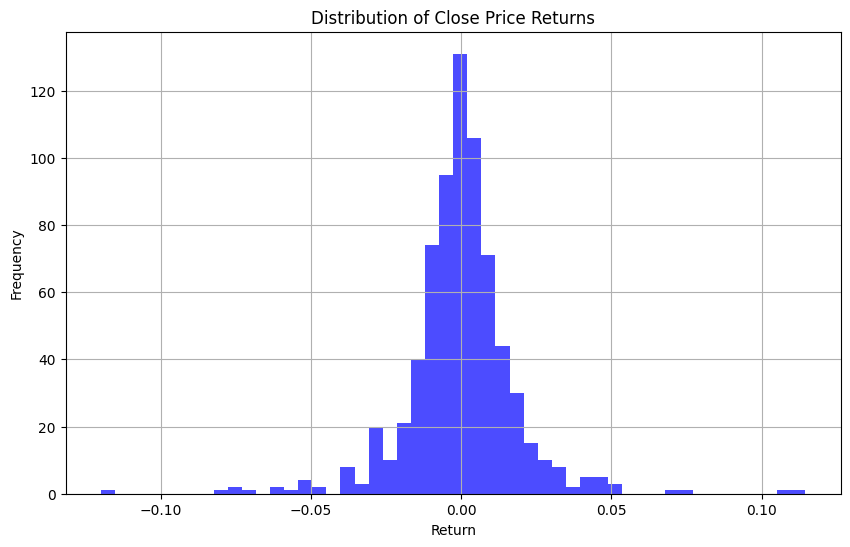

In [9]:
import matplotlib.pyplot as plt

syms = list(df_dict.keys())

df = df_dict[syms[9]]

print(syms[9])
returns = df['close'].pct_change().dropna()

plt.figure(figsize=(10, 6))
plt.hist(returns, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Close Price Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Green candles: 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
715    16.0
716    15.0
717    14.0
718    13.0
719    13.0
Length: 720, dtype: float64
Red candles: 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
715    18.0
716    19.0
717    20.0
718    21.0
719    21.0
Length: 720, dtype: float64


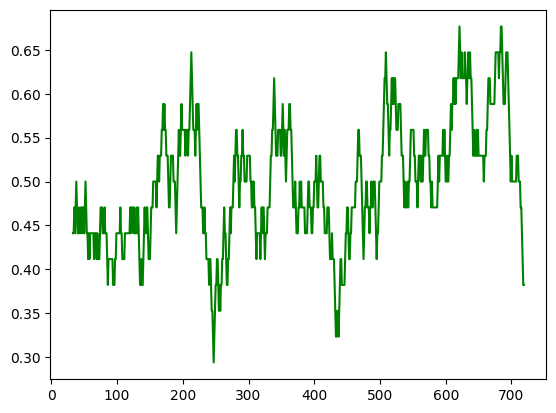

In [ ]:
green_candles = (df['close'] > df['open']).rolling(34).sum().dropna(inplace=True)
red_candles = (df['close'] < df['open']).rolling(34).sum().dropna(inplace=True)

print(f"Green candles: {green_candles}")
print(f"Red candles: {red_candles}")
rolling_ratio = green_candles / (green_candles + red_candles)

plt.plot(rolling_ratio, label='Rolling Ratio of Green Candles', color='green')
plt.show()